In [1]:
# Importing our dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Importing our data
path = 'Resources/stroke_data.csv'
df = pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
len(df)

43400

In [4]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
# Find null values
for column in df.columns:
    print(f'{column}: {df[column].isnull().sum()} null values')

id: 0 null values
gender: 0 null values
age: 0 null values
hypertension: 0 null values
heart_disease: 0 null values
ever_married: 0 null values
work_type: 0 null values
Residence_type: 0 null values
avg_glucose_level: 0 null values
bmi: 1462 null values
smoking_status: 13292 null values
stroke: 0 null values


In [6]:
# Dropping null values
df = df.dropna()
len(df)

29072

In [7]:
# Find duplicate entries
print(f'Duplicate entries: {df.duplicated().sum()}')

Duplicate entries: 0


In [8]:
# Remove the id column
df.drop(columns = ['id'], inplace = True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
6,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


### Fixing gender column

In [9]:
df['gender'].value_counts()

Female    17852
Male      11213
Other         7
Name: gender, dtype: int64

In [10]:
not_other_gender = df['gender'] != 'Other'
df = df.loc[not_other_gender]
df['gender'].value_counts()

Female    17852
Male      11213
Name: gender, dtype: int64

### Fixing work_type column

In [11]:
df['work_type'].value_counts()

Private          18950
Self-employed     5204
Govt_job          4195
children           615
Never_worked       101
Name: work_type, dtype: int64

In [12]:
x = {'children': 'Never_worked', 'No': 0, 'Yes': 1, 'Female': 0, 'Male': 1}   
df = df.replace(x)
df['work_type'].value_counts()

Private          18950
Self-employed     5204
Govt_job          4195
Never_worked       716
Name: work_type, dtype: int64

### Fixing Residence_type column

In [13]:
df['Residence_type'].value_counts()

Urban    14592
Rural    14473
Name: Residence_type, dtype: int64

In [14]:
df.rename(columns = {'Residence_type': 'residence_type'}, inplace = True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,1,58.0,1,0,1,Private,Urban,87.96,39.2,never smoked,0
3,0,70.0,0,0,1,Private,Rural,69.04,35.9,formerly smoked,0
6,0,52.0,0,0,1,Private,Urban,77.59,17.7,formerly smoked,0
7,0,75.0,0,1,1,Self-employed,Rural,243.53,27.0,never smoked,0
8,0,32.0,0,0,1,Private,Rural,77.67,32.3,smokes,0


### Looking at other categorical columns

In [15]:
df['ever_married'].value_counts()

1    21687
0     7378
Name: ever_married, dtype: int64

In [16]:
df['smoking_status'].value_counts()

never smoked       15746
formerly smoked     7093
smokes              6226
Name: smoking_status, dtype: int64

## Correlation to find out best features

In [17]:
correlation = df.corr()

In [18]:
correlation['stroke']

gender               0.012257
age                  0.154059
hypertension         0.078674
heart_disease        0.105142
ever_married         0.047724
avg_glucose_level    0.075447
bmi                 -0.004039
stroke               1.000000
Name: stroke, dtype: float64

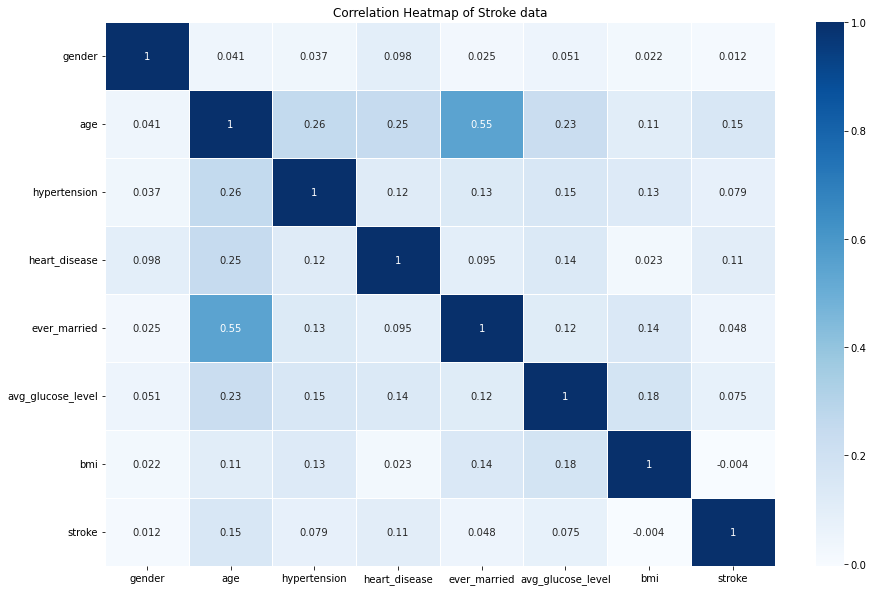

In [19]:
# Plotting the heatmap of correlation
plt.figure(figsize = (15,10))
heat_map = sns.heatmap(correlation, linewidth = 1 , annot = True, cmap = 'Blues')
plt.title('Correlation Heatmap of Stroke data')
plt.show()

## Encoding categorical variables

In [20]:
# Generate our categorical variable lists
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()

In [21]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df[df_cat]))

# Rename encoded columns
encode_df.columns = enc.get_feature_names_out(df_cat)
encode_df.head()

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,residence_type_Rural,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [22]:
# Merge one-hot encoded features and drop the originals
encoded_df = df.merge(encode_df, left_index=True, right_index=True).drop(df_cat, 1)
encoded_df.head()

C:\Users\Zarif\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,residence_type_Rural,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1,1,58.0,1,0,1,87.96,39.2,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,70.0,0,0,1,69.04,35.9,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,0,52.0,0,0,1,77.59,17.7,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
7,0,75.0,0,1,1,243.53,27.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0,32.0,0,0,1,77.67,32.3,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


# ML Model

In [23]:
# Remove stroke outcome target from features data
X = encoded_df.drop(columns= ['stroke'])
y = encoded_df.stroke

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)

In [24]:
# Normalizing the data

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Logistic Regression

In [25]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver = "lbfgs", max_iter = 200)

# Train the model
log_classifier.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test_scaled)
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.982


### SVM

In [26]:
# Define the SVM model
svm_classifier = SVC(kernel='linear')

# Train the model
svm_classifier.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = svm_classifier.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 SVM model accuracy: 0.982


### Decision Tree

In [27]:
# Define the Decision Tree model
decision_tree_classifier = tree.DecisionTreeClassifier()

# Train the model
decision_tree_classifier.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = decision_tree_classifier.predict(X_test_scaled)
print(f" Decision Tree model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Decision Tree model accuracy: 0.961


### Random Forest

In [28]:
# Create a random forest classifier.
rf_classifier = RandomForestClassifier(n_estimators = 128)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_classifier.predict(X_test_scaled)
print(f" Random Forest model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Random Forest model accuracy: 0.982


### Gradient Boosting

In [29]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb_classifier = GradientBoostingClassifier(n_estimators = 20, 
                                              learning_rate = learning_rate, 
                                              max_features = 5, 
                                              max_depth = 3)
    # Train the model
    gb_classifier.fit(X_train_scaled, y_train)
    
    # Evaluate the model
    y_pred = gb_classifier.predict(X_test_scaled)
    print(f" Gradient Boosting model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Gradient Boosting model accuracy: 0.982
 Gradient Boosting model accuracy: 0.981
 Gradient Boosting model accuracy: 0.981
 Gradient Boosting model accuracy: 0.980
 Gradient Boosting model accuracy: 0.980
 Gradient Boosting model accuracy: 0.979
